# Tarea 1
Dado el corpus proporcionado, obtener la curva de Zipf de las palabras en
escala logaritmica.
Pasos:

1. Limpiar el corpus: eliminar signos de puntuacion, de interrogacion, admiracion y elementos no lexicos.

2. Aplicar un algoritmo de Stemming a los tokens limpios.
3. Obtener las frecuencias de los tipos en el corpus.
4. Ordenar por el rango estadistico de mayor a menor.
5. Graficar el diagrama de dispersion rango-frecuencia en escala logarıtmica.

In [1]:
# Importamos las librerias

# Usamos os para cargar los libros
from os import listdir,getcwd
from os.path import isfile, join
import re


## Importamos el corpus
Lo primero que hacemos es importar el corpus al notebook para que podamos utilizarlos. En este caso definimos dos formas de cargar el corpus, ya sea por documento o cargando todos los documentos del folder.

In [2]:

# Obtenemos el path del folder donde se almacenan los corpus
folder_path = (getcwd() + r"\CorpusDocs")

# Los almacenamos en una lista donde se almacenan los nombres de los archivos.
# Esto es en caso de que usemos todos los corpus.
corpus_name_list = [f for f in listdir(folder_path) if isfile(join(folder_path, f))]

def loadAllCorpus():
    """
    Esta funcion carga todos los corpus que estan en el folder Corpus Docs.
    """
    corpis = ''
    for file in corpus_name_list:
        with open("./CorpusDocs/" + file, 'r', encoding="utf8") as f:
            corpis += f.read()
    return corpis

def loadCorpus(corpus_name):
    """
    Esta funcion nos sirve para cargar un corpus especifico
    """
    with open("./CorpusDocs/" + corpus_name, 'r', encoding="utf8") as f:
        corpus = f.read()
    return corpus
        

In [3]:
# Cargamos el corpus.

corpus = loadAllCorpus()
#corpus = loadCorpus('acustica (2).txt')

## Limpieza del Texto
Separamos las palabras de las oraciones para poder trabajar con ellas individualmente

In [4]:
words = corpus.split()
print(words[:10])

['Onda', 'sonora', 'Ondes', 'compression', '2d', '20', 'petit.gif', 'Una', 'onda', 'sonora']


Eliminamos la puntuación del documento, acentos y normalizamos el texto en minusculas. Para hacer la eliminación de los símbolos de puntuación utilziamos una tabla de traducción para optimizar la velocidad de procesamiento. Tambien fue necesario extender la tabla de símbolos para que incluyera algunos símbolos latinos que faltaban.

Para eliminar acentos usamos la libreria unidecode que se tiene que instalar adicionalmente: `pip install unidecode`

In [6]:
import string
import unidecode

print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [47]:
lat_punctuation = string.punctuation+'¿¡1234567890'

table = str.maketrans('', '', lat_punctuation)

In [48]:
clean_words = []

for word in words:
    word = word.translate(table)      # Quitamos simbolos de puntuacion
    word = word.lower()               # Minusculas
    word = unidecode.unidecode(word)  # Quitamos acentos.
    clean_words.append(word)

clean_words[:10]

['onda',
 'sonora',
 'ondes',
 'compression',
 'd',
 '',
 'petitgif',
 'una',
 'onda',
 'sonora']

## Stemming de Palabras
Para hacer el stemming de las palabras usamos NLTK. Para esto hay que instalar NLTK: 

Lo primero que hacemos es definir un stemmer. En este caso usaremos [Snowball Stemmer](http://snowball.tartarus.org/texts/introduction.html).

In [50]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

In [51]:
stemmed_text = []
for word in clean_words:
    stemmed_text.append(stemmer.stem(word))
    
print(stemmed_text[:10])

['onda', 'sonor', 'ondes', 'compression', 'd', '', 'petitgif', 'una', 'onda', 'sonor']


## Frecuencia de los tipos
Para medir la frecuencia de los tipo utilizaremos la funcion `FDist` de NLTK que hemos instalado previamente.

In [121]:
from nltk import FreqDist

In [126]:
fdist = FreqDist(stemmed_text)
fdist.most_common(25)

[('de', 7457),
 ('la', 4727),
 ('en', 3130),
 ('y', 2727),
 ('el', 2665),
 ('que', 2225),
 ('', 2145),
 ('a', 1833),
 ('los', 1491),
 ('se', 1449),
 ('las', 1179),
 ('del', 1133),
 ('un', 1033),
 ('por', 1005),
 ('una', 954),
 ('es', 910),
 ('con', 765),
 ('par', 717),
 ('com', 674),
 ('o', 603),
 ('su', 596),
 ('al', 462),
 ('mas', 423),
 ('no', 417),
 ('pued', 339)]

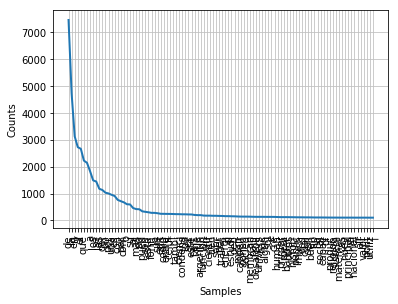

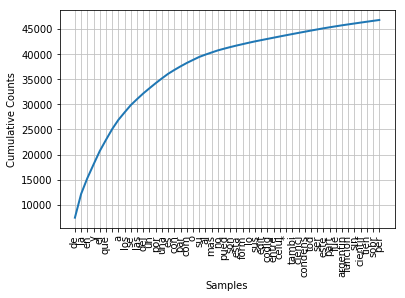

In [116]:
fdist.plot(100)
fdist.plot(50, cumulative=True)

## Frecuencia de los tipos en forma logaritmica
Se aplicará el logaritmo base 10 a cada una de las frecuencias ordenadas de mayor a menor.

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize as min
logSamples = np.log(range(1,len(fdist)+1))
logCounts = np.log(sorted(fdist.values(), reverse=True))

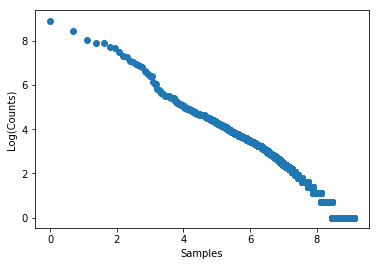

In [120]:
plt.scatter(logSamples,logCounts)
plt.xlabel("Samples")
plt.ylabel("Log(Counts)")
plt.show()

## Aproximación de una recta (dependencia lineal)
Para generar un modelo de probabilidad condicional, es necesario que las variables sean dependientes entre si, es por ello que se necesitará generar un modelo de dependencia lineal.
Debido a esto, se debera obtener el Error Cuadratico Mínimo para aplicarlo en la ecuación de la recta:


                                            y = mx + b
                                        
donde:

    b = Valor máximo de frecuencia
    m = Error cuadrático mínimo
    x = Frecuencias

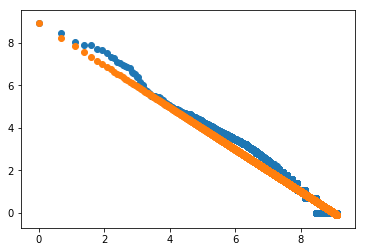

In [139]:
errorCuad = lambda q: sum(((q*logSamples + logCounts[0])-logCounts)**2)
slope = min(errorCuad, 1).x[0]
plt.scatter(logSamples,logCounts)
plt.scatter(logSamples,slope*logSamples+ logCounts[0])
plt.show()

# Realizado por:
- Bustos Ramírez Luis Enrique
- Flores Cortés Juan Pablo
